# SPEECH REGOGNITION USING PYTHON

## ABSTRACT: 

The project involves developing a system that performs speech recognition and emotion analysis on speech data using Python and the Librosa library. The goal is to recognize the speech input and analyze the speaker's emotions based on the spoken words' acoustic properties. The project uses various Python libraries such as speech_recognition and pyAudioAnalysis. The system involves reading in a WAV file, performing speech recognition, and using the Librosa library to extract features from the speech signal for emotion analysis. The project includes training machine learning models on a labeled dataset of speech samples with associated emotional labels and evaluating their accuracy on a test set. The system has potential applications in various fields, such as customer service, education, and healthcare. The use of Librosa library provides more advanced signal processing techniques, such as mel-frequency cepstral coefficients (MFCCs) and chroma features, which can improve the accuracy of emotion analysis in speech.

## DATA DESCRIPTION:

The provided dataset is a dataset containing speech by 24 professional actors, each of whom portrays 8 different emotions. The emotions include calm, happy, sad, angry, fearful, surprise, disgust, and neutral.

Each recording in the dataset consists of an actor performing a short vocal expression of an emotion in speech. The recordings are in WAV format and have a sampling rate of 48 kHz and a bit depth of 16 bits.

--------------------------------------------------------------------------------------------------------------------------------

Speech recognition is the process of converting spoken words into text using machine learning algorithms, and Python provides a powerful and flexible framework for developing speech recognition systems that can transcribe audio files or real-time speech input.

## Python Audio Processing Basics

1. Audio Formats

- .mp3 - compresses low quality
- .flac - medium quality
- .wav - uncompressed best quality

2. Signal wave parameters
- number of channels - Mono : 1 Channel , Stereo : 2 Channels
- sample width - number of bytes for eah sample
- framerate/sample_rate - No. of samples per second ( 44,100 Hz )
- number of frames - Total number of frames
- values of a frame

In [2]:
import wave

import IPython as ip

import glob

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import pyaudio

from pydub import AudioSegment

import requests

import sys

import json

import youtube_dl

import librosa
import soundfile
import os, pickle

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score

import speech_recognition as sr

### Working with .wav files in Python

In [3]:
import wave

# Open the .wav file and print some properties
obj = wave.open("03-01-01-01-01-01-01.wav", "rb")
print("Number of channels:", obj.getnchannels())
print("Sample width:", obj.getsampwidth())
print("Frame rate:", obj.getframerate())
print("Number of frames:", obj.getnframes())
print("Parameters:", obj.getparams())

# Calculate the duration of the audio file
t_audio = obj.getnframes() / obj.getframerate()
print("Audio time (s):", round(t_audio, 2))

# Read all the frames from the file
frames = obj.readframes(-1)
print("Type of frames:", type(frames), type(frames[0]))
print("Total number of frames in sample:", len(frames)) # because sample width is 2
print("Total number of frames:", len(frames) / 2)

# Close the file
obj.close()

# Save the file with some modifications
obj_new = wave.open("Test 1.wav", "wb")
obj_new.setnchannels(1)
obj_new.setsampwidth(2)
obj_new.setframerate(16000)
obj_new.writeframes(frames) # duplicated frames
obj_new.close()

Number of channels: 1
Sample width: 2
Frame rate: 16000
Number of frames: 52853
Parameters: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=52853, comptype='NONE', compname='not compressed')
Audio time (s): 3.3
Type of frames: <class 'bytes'> <class 'int'>
Total number of frames in sample: 105706
Total number of frames: 52853.0


In [4]:
# Display the audio file 
ip.display.Audio(r'C:/Users/Bsingh/Downloads/Project 6/Actor_01/Test 1.wav')

This line of code uses the IPython library to display an audio file located at the specified path. The audio file is a .wav file named "Test 1.wav" located in the "Actor_01" folder in the "Downloads/Project 6" directory on the C: drive of the computer.

The ip.display.Audio() function takes the file path as its argument and creates an audio player object that can play the audio file directly in the Jupyter notebook or in a web browser.

This line of code is useful for quickly testing and verifying that the audio file was processed correctly and can be played back without any issues. It allows you to listen to the audio directly in the notebook or browser without having to open a separate audio player application.

### Plotting a .wav file in Matplotlib

This code demonstrates how to read and plot the signal data from a .wav file using the wave, numpy, and matplotlib modules in Python. The signal data is converted from a bytes object to a numpy array and then plotted using Matplotlib. The resulting plot shows the amplitude of the audio signal as a function of time.

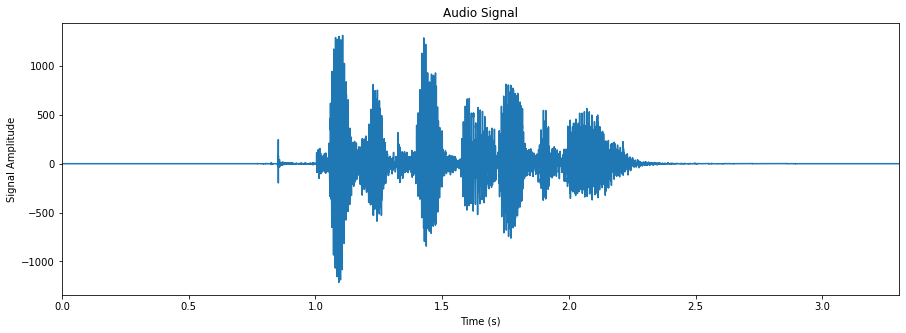

'This creates a new figure with a size of 15x5 inches using plt.figure().\nThe signal data is plotted as a line graph using plt.plot().\nThe plot title, y-axis label, and x-axis label are set using plt.title(), plt.ylabel(), and plt.xlabel(), respectively.\nThe x-axis limits are set to 0 and t_audio using plt.xlim(). Finally, the plot is displayed using plt.show().'

In [5]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Open the .wav file
obj = wave.open("test 1.wav", "rb")

# Get the number of frames and the signal data
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)
'''The Wave_read.getnframes() method returns the number of audio frames in the .wav file.
The Wave_read.readframes() method reads the entire contents of the file as a bytes object (-1 specifies that all frames 
should be read).'''

# Close the file
obj.close()

# Convert the bytes object into a numpy array
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
''' The numpy.frombuffer() function converts the bytes object (signal_wave) to a numpy array (signal_array) 
 with a data type of np.int16. This data type is appropriate for 16-bit signed integer audio samples. '''

# Calculate the time values for each sample
t_audio = n_samples / obj.getframerate()
times = np.linspace(0, t_audio, num=n_samples)
'''The total length of the audio file (t_audio) is calculated as the number of samples (n_samples) divided by the frame rate
(Wave_read.getframerate()). The numpy.linspace() function generates a sequence of n_samples evenly-spaced time values between 
0 and t_audio.'''

# Plot the signal data
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.title("Audio Signal")
plt.ylabel("Signal Amplitude")
plt.xlabel("Time (s)")
plt.xlim(0, t_audio)
plt.show()
'''This creates a new figure with a size of 15x5 inches using plt.figure().
The signal data is plotted as a line graph using plt.plot().
The plot title, y-axis label, and x-axis label are set using plt.title(), plt.ylabel(), and plt.xlabel(), respectively.
The x-axis limits are set to 0 and t_audio using plt.xlim(). Finally, the plot is displayed using plt.show().'''

### Recording from microphone

In [29]:
# Recording from microphone 
import pyaudio
import wave
from pydub import AudioSegment

FRAMES_PER_BUFFER = 3200 #This sets a constant for the number of frames per buffer to read from the audio stream at a time.

FORMAT = pyaudio.paInt16
CHANNELS = 1 
RATE = 16000

'''These constants set the format of the audio data (16-bit integer), the number of channels (1 for mono), 
and the sampling rate (16000 Hz).'''

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=FRAMES_PER_BUFFER)

''' initialize a PyAudio object and open an audio stream for recording. 
The stream is configured with the constants defined earlier.'''

print("start recording")

seconds = 5
frames = []
for i in range(0, int(RATE/FRAMES_PER_BUFFER * seconds)):
    data = stream.read(FRAMES_PER_BUFFER)
    frames.append(data)
    
''' start recording audio from the stream for 5 seconds, reading a chunk of audio data from the stream every time
through a loop. Each chunk is appended to a list of frames'''
    
stream.stop_stream()
stream.close()
p.terminate()

''' stop and close the audio stream and terminate the PyAudio object.'''

# saving the file
obj = wave.open("output1.wav", "wb")
obj.setnchannels(CHANNELS)
obj.setsampwidth(p.get_sample_size(FORMAT))
obj.setframerate(RATE)
obj.writeframes(b"".join(frames))
obj.close()

''' create a new wave file with the name "output1.wav", set its properties to match the recorded audio
(number of channels, sample width, and sampling rate), and write the frames to the file.'''

# increase volume
audio = AudioSegment.from_wav("output1.wav")
audio = audio + 6 
audio = audio * 2 
audio = audio.fade_in(2000)
audio.export("mashup1.wav", format="wav")

audio2 = AudioSegment.from_mp3("mashup1.wav")

'''load the recorded audio as an AudioSegment using the pydub library, increase the volume by 6 decibels, double the speed,
fade in the beginning of the audio over 2 seconds, and save the modified audio as "mashup1.wav".'''
print("done")

start recording
done


This code records audio from the microphone for 5 seconds and saves the output as a WAV file named output1.wav. The audio is recorded with a sample rate of 16000 Hz, with 16-bit depth and 1 channel.

After recording, the code increases the volume of the audio by 6 dB, doubles the speed, fades it in over 2 seconds, and saves the final output as a new WAV file named mashup1.wav.

The code imports the following libraries:

pyaudio: for audio input and output using the microphone and speaker
wave: for reading and writing WAV files
pydub: for audio manipulation and effects
The code first initializes the PyAudio object and opens a stream for recording audio. The recording is done for 5 seconds, with the audio data stored in a list of frames. The stream is then stopped and closed, and PyAudio is terminated.

The code then saves the recorded audio frames into a WAV file using the wave library. The WAV file is created with the same parameters as the recording: 16-bit depth, 1 channel, and a sample rate of 16000 Hz.

Finally, the code uses pydub to apply some audio effects to the recorded audio. The audio is loaded from output1.wav, volume is increased by 6 dB, speed is doubled, and the audio is faded in over 2 seconds. The final audio is saved as mashup1.wav.

#### Before moving forward towards emotional analysis of the dataset provided , we should be aware of some of the terms related to different feature extraction techniques used in audio signal processing.

#### MFCC 
MFCC (Mel-Frequency Cepstral Coefficients) is a technique that extracts the power spectral envelope of a sound signal based on the human auditory system. The technique involves taking the Fourier Transform of small overlapping windows of the audio signal, and then mapping the resulting spectrum onto a Mel-frequency scale. The logarithm of the magnitudes of the Mel-frequency spectrum is then computed, followed by a Discrete Cosine Transform (DCT) to get the final set of MFCC coefficients. MFCCs are commonly used in speech recognition and music analysis tasks.

#### Mel
Mel Spectrogram is a technique that uses the Mel-frequency scale to create a spectrogram of a sound signal. The technique involves dividing the frequency spectrum of the audio signal into a set of overlapping triangular windows that are equally spaced in Mel-frequency. The power spectrum of each window is then computed and used to create a 2D spectrogram that represents the frequency content of the signal over time.

#### Chroma
Chroma feature is another technique used in music analysis that computes a 12-element vector that represents the distribution of energy across the 12 semitones of the musical octave. Chroma features are computed by mapping the power spectrum of the audio signal onto a chromatic scale, and then summing the power of all the frequency bins that fall within each semitone of the scale. Chroma features are useful for tasks like genre classification and chord recognition.

### Emotions analysis on the dataset provided

In [7]:
import soundfile
import librosa
import numpy as np

def extract_feature(file_name, mfcc=True, chroma=True, mel=True):
    # Open the sound file and read its content and sample rate
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        
        # Compute the short-time Fourier transform (STFT) if chroma is True
        if chroma:
            stft = np.abs(librosa.stft(X))
        
        result = np.array([])
        
        # Compute Mel-frequency cepstral coefficients (MFCCs) if mfcc is True
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        
        # Compute chroma feature if chroma is True
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
            result = np.hstack((result, chroma))
        
        # Compute Mel-scaled spectrogram feature if mel is True
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
            result = np.hstack((result, mel))
    
    return result

#### Here's what each line of the code does:

1. Import necessary libraries: soundfile, librosa, and numpy
2. Define a function called extract_feature that takes a file name, mfcc, chroma, and mel as arguments
3. Use the soundfile library to open the sound file specified by file_name
4. Read the contents of the sound file into a float32 numpy array X
5. Get the sample rate of the sound file using the samplerate attribute of sound_file
6. Compute the short-time Fourier transform (STFT) if chroma is True
7. Create an empty numpy array called result
8. Compute Mel-frequency cepstral coefficients (MFCCs) if mfcc is True
9. Append the resulting MFCCs to result using the hstack function
10. Compute chroma feature if chroma is True
11. Append the resulting chroma features to result using the hstack function
12. Compute Mel-scaled spectrogram feature if mel is True
13. Append the resulting Mel-scaled spectrogram features to result using the hstack function
14. Return the resulting numpy array result which contains all the features.

In [8]:
# Emotions assumed in the dataset 

emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

# Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

We have made a dictionary and a list definition that relates to the emotions present in the dataset.

The dictionary emotions contains key-value pairs of emotion codes and their corresponding emotion labels, where each key is a two-digit numerical code representing a specific emotion and the value is the corresponding name of the emotion.

The list observed_emotions contains the names of the emotions that we want to observe from the dataset. In this case, we have chosen 'calm', 'happy', 'fearful', and 'disgust' as the four emotions of interest. This list will be used later on to filter out the data corresponding to these emotions from the dataset.

In [9]:
#  Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x, y = [], []
    for file in glob.glob("C:/Users/Bsingh/Downloads/Project 6/Actor_2*//*.wav"):
        # D:\\DataFlair\\ravdess data\\Actor_*\\*.wav
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

This function loads the data from the sound files in a specified directory, extracts the relevant features for each sound file using the extract_feature function, and returns the resulting features along with their corresponding emotions split into training and testing sets.

The function takes a single argument, test_size, which specifies the fraction of the data that should be used for testing (default is 0.2, or 20%).

Inside the function, the glob function is used to find all sound files in the specified directory and for each file, the filename is extracted and the corresponding emotion label is determined from the file name using a dictionary called emotions.

If the determined emotion is not in the list of observed emotions (observed_emotions), the loop skips to the next file. Otherwise, the function extract_feature is called to extract the relevant features from the sound file, and the resulting feature vector is added to the x list along with its corresponding emotion label in the y list.

Finally, the train_test_split function from scikit-learn is used to split the data into training and testing sets, which are returned by the function.

In [11]:
# Split the dataset
x_train, x_test, y_train, y_test = load_data(test_size=0.25)

calls the load_data() function to split the dataset into training and testing sets. The function takes an argument test_size, which determines the percentage of the data that should be used for testing. By default, test_size is set to 0.2 or 20%.

The function returns four variables, x_train, x_test, y_train, and y_test, which are assigned values from the returned tuple. x_train and y_train contain the training data, while x_test and y_test contain the testing data.

In [12]:
x_test #holds the features of the audio files in the test set

array([[-5.91600464e+02,  6.96530304e+01, -4.92870474e+00, ...,
         1.06970336e-04,  7.42832926e-05,  2.83276968e-05],
       [-4.68747345e+02,  4.84515991e+01, -1.35927353e+01, ...,
         7.79429858e-04,  4.31830180e-04,  3.23308836e-04],
       [-4.35057098e+02, -1.31232190e+00, -3.15596752e+01, ...,
         4.74787736e-03,  2.95279035e-03,  1.27994292e-03],
       ...,
       [-6.75295044e+02,  3.63712540e+01, -4.91378832e+00, ...,
         2.07607009e-04,  1.06858439e-04,  4.47935927e-05],
       [-5.70449829e+02,  3.94823685e+01, -7.00299978e-01, ...,
         3.85820004e-03,  1.85037055e-03,  1.05014653e-03],
       [-5.68205688e+02,  2.86680851e+01, -1.51740227e+01, ...,
         8.70296935e-05,  5.76806888e-05,  3.69184127e-05]])

In [13]:
#number of features extracted

print(f'features extracted : {x_train.shape[1]}')

features extracted : 180


In [14]:
# Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(120, 40)


In [15]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

This line of code initializes a Multi Layer Perceptron (MLP)* Classifier. MLP is a type of feedforward neural network that consists of multiple layers of nodes, each connected to all nodes in the previous and next layer. The MLPClassifier is implemented in scikit-learn and is used for classification tasks.

The function takes several hyperparameters as input:

1. alpha: regularization parameter that prevents overfitting
2. batch_size: the number of samples per batch during training
3. epsilon: the value added to the denominator for numerical stability
4. hidden_layer_sizes: the number of neurons in each hidden layer. In this case, there is one hidden layer with 300 neurons.
5. learning_rate: determines how the weights are updated during training. 'adaptive' means that the learning rate changes based on the progress of training.
6. max_iter: the maximum number of iterations for the solver to converge.

#### *MLP 
MLP stands for Multi-Layer Perceptron. It is a type of artificial neural network that consists of multiple layers of nodes, also called neurons. Each neuron receives input signals from the previous layer and applies a transformation to produce an output signal, which is then passed on to the next layer. The first layer is the input layer, and the last layer is the output layer. The layers in between are called hidden layers. MLP is a feedforward neural network, which means that the signals flow only in one direction, from input to output. MLP is a popular type of neural network used for various tasks such as classification, regression, and prediction.

In [16]:
# Train the model
model.fit(x_train,y_train)

C:\Users\Bsingh\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:611: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [17]:
# Predict for the test set
y_pred=model.predict(x_test)

In [18]:
y_pred # stores the predicted emotions made by the MLP classifier

array(['calm', 'fearful', 'fearful', 'disgust', 'happy', 'fearful',
       'happy', 'happy', 'calm', 'fearful', 'happy', 'happy', 'happy',
       'fearful', 'fearful', 'disgust', 'fearful', 'fearful', 'happy',
       'calm', 'disgust', 'fearful', 'disgust', 'calm', 'calm', 'happy',
       'happy', 'calm', 'disgust', 'disgust', 'fearful', 'happy', 'calm',
       'calm', 'fearful', 'disgust', 'fearful', 'calm', 'disgust',
       'happy'], dtype='<U7')

In [30]:
# Calculate the accuracy of our model
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.00%


The accuracy_score function from the sklearn.metrics module is used to calculate the accuracy of our model by comparing the predicted labels (y_pred) with the true labels (y_true) of the test set.

In [20]:
#dataframe creation

df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
df.head(20)

,Actual,Predicted
0,calm,calm
1,fearful,fearful
2,fearful,fearful
3,fearful,disgust
4,happy,happy
5,happy,fearful
6,happy,happy
7,happy,happy
8,calm,calm
9,fearful,fearful


In [21]:
# writing model to a different file

with open( 'modelForPrediction1.sav','wb') as f:
    pickle.dump(model,f)

saves the trained model to a file named "modelForPrediction1.sav" in binary format using the "pickle" module. The "wb" argument is passed to the "open" function to open the file in binary write mode. The "pickle.dump" function is used to write the trained model to the file. This is a common practice to save the trained model so that it can be used later without retraining the model.

In [31]:
# passing the file to the model and predicting
filename='modelforPrediction1.sav'
loaded_model=pickle.load(open(filename,'rb')) #loading the model file from the storage

feature=extract_feature("C:\\Users\\Bsingh\\Downloads\\Project 6\\Actor_02\\03-01-01-01-01-01-02.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
print(prediction)

['calm']


### Gender Guessing using pydub

In [26]:
import pydub
import speech_recognition as sr

# Load the audio file
x = str("C:/Users/Bsingh/Downloads/Project 6/Actor_16/03-01-02-02-01-02-16.wav")
audio_file = pydub.AudioSegment.from_wav(x)

# Convert the audio to 16-bit mono format
audio_file = audio_file.set_frame_rate(16000).set_channels(1)

# Initialize the speech recognizer
r = sr.Recognizer()

# Transcribe the audio file to text
with sr.AudioFile(x) as source:
    audio_data = r.record(source)
    
transcription = r.recognize_google(audio_data)

# Determine if the speaker is male or female
if 'he' in transcription.lower() or 'him' in transcription.lower() or 'his' in transcription.lower():
    print('The speaker is male.')
elif 'she' in transcription.lower() or 'her' in transcription.lower():
    print('The speaker is female.')
else:
    print('Unable to determine the gender of the speaker.')

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

The code determines the gender of the speaker based on the text transcription. It checks for the presence of pronouns such as "he", "him", "his", "she", and "her" to determine whether the speaker is male or female. If none of these pronouns are present, the code outputs that it is unable to determine the gender of the speaker

### Extracting meta data

In [28]:
#Extract Meta Data

import csv

import os

# Specify the output file path
output_file = "C:/Users/Bsingh/Downloads/Project 6/Actor_01/meta.csv"

folder_path = "C:/Users/Bsingh/Downloads/Project 6/Actor_24"

# Create a list to store the metadata for each file
metadata_list = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(folder_path, filename)

        # Use Pydub to read the .wav file and extract the metadata
        audio = AudioSegment.from_file(file_path, format="wav")
        sample_rate = audio.frame_rate
        bit_depth = audio.sample_width * 8
        duration = len(audio) / 1000
        channels = audio.channels

        # Use the wave module to extract additional metadata
        with wave.open(file_path, "rb") as wave_file:
            num_frames = wave_file.getnframes()

        # Add the metadata to the list
        metadata_list.append([filename, sample_rate, bit_depth, duration, channels, num_frames])

# Write the metadata to a .csv file
with open(output_file, "w", newline="") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Filename", "Sample Rate", "Bit Depth", "Duration (s)", "Channels", "Number of Frames"])
    writer.writerows(metadata_list)

#### The code does the following:

1. Imports the csv module to allow writing to .csv files.
2. Specifies the output file path where the metadata will be written to a .csv file.
3. Creates an empty list to store the metadata for each file in the folder.
4. Loops through each file in the folder and extracts metadata using the AudioSegment and wave modules.
5. Adds the extracted metadata for each file to the metadata list as a new row.
6. Writes the metadata list to a .csv file with column headers.